In [ ]:
!git clone https://github.com/koreal6803/crypto_backtrader.git
!pip install python-binance
!pip install bitmex
!pip install Backtesting
!pip install backtrader


Cloning into 'crypto_backtrader'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 13 (delta 0), reused 13 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), done.
     |████████████████████████████████| 3.1MB 6.0MB/s 
     |████████████████████████████████| 358kB 29.4MB/s 
     |████████████████████████████████| 2.7MB 31.6MB/s 
     |████████████████████████████████| 61kB 9.5MB/s 
     |████████████████████████████████| 1.1MB 48.9MB/s 
     |████████████████████████████████| 61kB 9.7MB/s 
     |████████████████████████████████| 235kB 44.5MB/s 
     |████████████████████████████████| 92kB 3.9MB/s 
     |████████████████████████████████| 143kB 8.5MB/s 
     |████████████████████████████████| 71kB 6.0MB/s 
  Created wheel for simplejson: filename=simplejson-3.17.0-cp36-cp36m-linux_x86_64.whl size=114205 sha256=e9d5b3056a6dfc326f3ce15567a357a75aa91caa1f29c5c3bac543b525324c60
  Stored 

In [ ]:
cd crypto_backtrader/


/content/crypto_backtrader


In [ ]:
from finlab import crypto
df = crypto.get_all_binance('BTCUSDT', '4h')

sma1 = df.Close.rolling(20).mean()
sma2 = df.Close.rolling(60).mean()

df.Close['2020'].plot()
sma1['2020'].plot()
sma2['2020'].plot()




ModuleNotFoundError: ignored

In [ ]:
condition = sma1 > sma2
condition

print(df.Close)
print(df.Close.shift(1))


Timestamp
2017-08-17 04:00:00    4349.99
2017-08-17 08:00:00    4427.30
2017-08-17 12:00:00    4352.34
2017-08-17 16:00:00    4325.23
2017-08-17 20:00:00    4285.08
                        ...   
2020-04-28 12:00:00    7716.91
2020-04-28 16:00:00    7717.04
2020-04-28 20:00:00    7738.98
2020-04-29 00:00:00    7815.30
2020-04-29 04:00:00    7823.20
Name: Close, Length: 5900, dtype: float64
Timestamp
2017-08-17 04:00:00        NaN
2017-08-17 08:00:00    4349.99
2017-08-17 12:00:00    4427.30
2017-08-17 16:00:00    4352.34
2017-08-17 20:00:00    4325.23
                        ...   
2020-04-28 12:00:00    7728.62
2020-04-28 16:00:00    7716.91
2020-04-28 20:00:00    7717.04
2020-04-29 00:00:00    7738.98
2020-04-29 04:00:00    7815.30
Name: Close, Length: 5900, dtype: float64


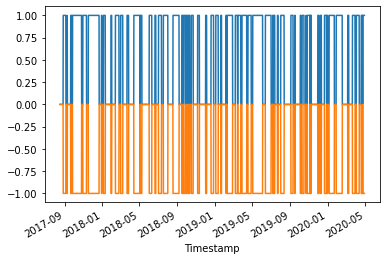

In [ ]:
signal_long = (sma1 > sma2) & (sma1.shift() > sma2.shift())
signal_short = (sma1 > sma2) & (sma1.shift() < sma2.shift())

signal_long.astype(int).plot()
(-signal_long.astype(int)).plot()

In [ ]:
signal = signal_long.copy()
signal[signal_short] = -1

signal[signal_short]
# signal 

In [ ]:
from finlab import crypto
from backtesting import Backtest
from backtesting.lib import SignalStrategy
import pandas as pd

df = crypto.get_all_binance('BTCUSDT', '4h')

class Strategy(SignalStrategy):
    
    def init(self):
        super().init()
        
        # Precompute the two moving averages
        close = pd.Series(self.data.Close)
        sma1 = close.rolling(20).mean()
        sma2 = close.rolling(60).mean()
        
        # Precompute signal
        signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
        signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())
        
        signal = signal_long
        signal[signal_short] = -1
        
        self.set_signal(signal)
        
        
    def next(self):
        super().next()

bt = Backtest(df, Strategy)
bt.run()
# bt.plot()

ModuleNotFoundError: ignored

In [ ]:
from backtesting import Backtest
from backtesting.lib import SignalStrategy
import pandas as pd
from finlab import crypto


class Strategy(SignalStrategy):
    
    n1 = 20
    n2 = 60
    
    def init(self):
        super().init()
        
        # Precompute the two moving averages
        close = pd.Series(self.data.Close)
        sma1 = close.rolling(self.n1).mean()
        sma2 = close.rolling(self.n2).mean()
        
        # Precompute signal
        signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
        signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())
        
        # combine signal
        signal = signal_long
        signal[signal_short] = -1
        
        # add signal
        self.set_signal(signal)

df = crypto.get_all_binance('BTCUSDT', '4h')

bt = Backtest(df, Strategy)
result1 = bt.run()
bt.plot()

2020-05-10 16:00:00 2020-05-10 17:07:21.335884
All caught up..!


,Open,High,Low,Close
Timestamp,,,,
2017-08-17 04:00:00,4261.48,4349.99,4261.32,4349.99
2017-08-17 08:00:00,4333.32,4485.39,4333.32,4427.30
2017-08-17 12:00:00,4436.06,4485.39,4333.42,4352.34
2017-08-17 16:00:00,4352.33,4354.84,4200.74,4325.23
2017-08-17 20:00:00,4307.56,4369.69,4258.56,4285.08
